In [7]:
from locallib import eyeutil


In [8]:
def check_sums(msgs, to_print=True):
    # Calculate cumulative sum up to and including each column in each message
    msgs_cumsum = []
    for msg in msgs:
        cumsum = [0]
        for val in msg:
            cumsum.append(cumsum[-1] + val)
        msgs_cumsum.append(cumsum[1:])

    # For each pair of messages
    count = 0
    for msg1 in range(len(msgs)):
        for msg2 in range(msg1 + 1, len(msgs)):
            min_col = min(len(msgs[msg1]), len(msgs[msg2]))

            # For each range within the messages
            for end_col in range(min_col):
                for start_col in range(end_col):
                    
                    # Find sum between columns
                    msg1_sum = msgs_cumsum[msg1][end_col]
                    msg2_sum = msgs_cumsum[msg2][end_col]
                    if start_col > 0:
                        msg1_sum -= msgs_cumsum[msg1][start_col - 1]
                        msg2_sum -= msgs_cumsum[msg2][start_col - 1]

                    ct1 = msgs[msg1][start_col:end_col + 1]
                    ct2 = msgs[msg2][start_col:end_col + 1]

                    if ct1 == ct2:
                        break

                    if msg1_sum == msg2_sum:
                        if to_print:
                            print(f"{msg1} and {msg2} | columns {start_col} to {end_col} | {msg1_sum}")
                        count += 1
    
    if to_print:
        print(f"Total: {count}")

    return count


In [9]:
check_sums(eyeutil.msgs_eye_tri)

0 and 1 | columns 57 to 58 | 100
0 and 1 | columns 0 to 59 | 2430
0 and 1 | columns 26 to 63 | 1503
0 and 1 | columns 1 to 67 | 2608
0 and 1 | columns 2 to 67 | 2542
0 and 1 | columns 3 to 67 | 2537
0 and 1 | columns 4 to 67 | 2489
0 and 1 | columns 5 to 67 | 2427
0 and 1 | columns 6 to 67 | 2414
0 and 1 | columns 7 to 67 | 2339
0 and 1 | columns 8 to 67 | 2310
0 and 1 | columns 9 to 67 | 2286
0 and 1 | columns 10 to 67 | 2225
0 and 1 | columns 11 to 67 | 2183
0 and 1 | columns 12 to 67 | 2113
0 and 1 | columns 13 to 67 | 2047
0 and 1 | columns 14 to 67 | 1985
0 and 1 | columns 15 to 67 | 1953
0 and 1 | columns 16 to 67 | 1939
0 and 1 | columns 17 to 67 | 1858
0 and 1 | columns 18 to 67 | 1850
0 and 1 | columns 19 to 67 | 1835
0 and 1 | columns 20 to 67 | 1757
0 and 1 | columns 21 to 67 | 1755
0 and 1 | columns 22 to 67 | 1726
0 and 1 | columns 23 to 67 | 1713
0 and 1 | columns 24 to 67 | 1664
0 and 1 | columns 25 to 67 | 1663
0 and 1 | columns 62 to 80 | 726
0 and 1 | columns 27 to 91

473

In [10]:
counts = []
for i in range(100):
    msgs_random, _ = eyeutil.generate_random_msgs_tri(82)
    count = check_sums(msgs_random, False)
    counts.append(count)
    print(f"Random {i}: {count}")


Random 0: 476
Random 1: 551
Random 2: 488
Random 3: 468
Random 4: 472
Random 5: 710
Random 6: 557
Random 7: 441
Random 8: 575
Random 9: 537
Random 10: 634
Random 11: 477
Random 12: 510
Random 13: 488
Random 14: 366
Random 15: 624
Random 16: 568
Random 17: 521
Random 18: 490
Random 19: 533
Random 20: 477
Random 21: 445
Random 22: 532
Random 23: 544
Random 24: 442
Random 25: 423
Random 26: 465
Random 27: 616
Random 28: 505
Random 29: 604
Random 30: 648
Random 31: 482
Random 32: 498
Random 33: 511
Random 34: 564
Random 35: 500
Random 36: 424
Random 37: 534
Random 38: 659
Random 39: 565
Random 40: 517
Random 41: 608
Random 42: 491
Random 43: 444
Random 44: 613
Random 45: 528
Random 46: 564
Random 47: 656
Random 48: 478
Random 49: 572
Random 50: 445
Random 51: 483
Random 52: 516
Random 53: 529
Random 54: 509
Random 55: 660
Random 56: 436
Random 57: 417
Random 58: 494
Random 59: 563
Random 60: 684
Random 61: 600
Random 62: 491
Random 63: 498
Random 64: 609
Random 65: 498
Random 66: 522
Rando

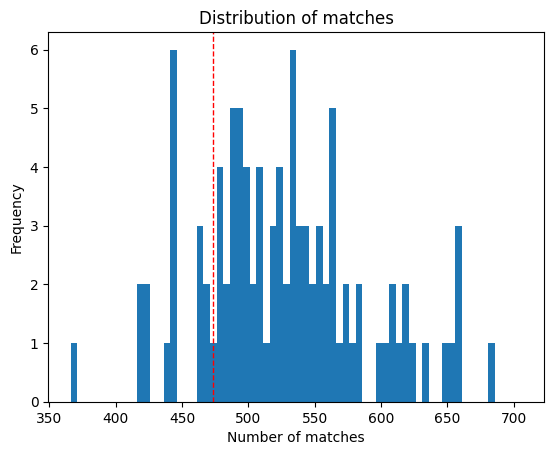

In [11]:
# Plot distributions of counts
import matplotlib.pyplot as plt
import numpy as np

plt.hist(counts, bins=np.arange(min(counts), max(counts), 5))
plt.xlabel("Number of matches")
plt.ylabel("Frequency")
plt.title("Distribution of matches")

# Plot real message amount on chart
real_count = 473
plt.axvline(real_count, color='r', linestyle='dashed', linewidth=1)
plt.show()
